# Analysis of the Largest Companies in the United States by Revenue

### Exploratory Data Analysis (EDA)

##### 1.Load the Data

In this section, we import the necessary libraries and load the dataset containing information about the largest companies in the United States by revenue.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# Load the Dataset
data = pd.read_csv('list of largest companies.csv')

In [3]:
# Display the first few rows
print(data.head())

   Rank                Name                    Industry  \
0   1.0             Walmart                      Retail   
1   2.0              Amazon  Retail and cloud computing   
2   3.0               Apple        Electronics industry   
3   4.0  UnitedHealth Group                  Healthcare   
4   5.0  Berkshire Hathaway                Conglomerate   

  Revenue (USD millions) Revenue growth  Employees           Headquarters  
0               6,48,125          6.00%  21,00,000  Bentonville, Arkansas  
1               5,74,785         11.90%  15,25,000    Seattle, Washington  
2               3,83,482         -2.80%   1,61,000  Cupertino, California  
3               3,71,622         14.60%   4,40,000  Minnetonka, Minnesota  
4               3,64,482         20.70%   3,96,500        Omaha, Nebraska  


##### 2.Data Overview

We perform a summary of the dataset to understand its structure and identify any initial insights.

In [4]:
# Summary Statistics
print(data.describe())

             Rank
count  100.000000
mean    50.500000
std     29.011492
min      1.000000
25%     25.750000
50%     50.500000
75%     75.250000
max    100.000000


In [6]:
# Data Types and Missing Values
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Rank                    100 non-null    float64
 1   Name                    100 non-null    object 
 2   Industry                100 non-null    object 
 3   Revenue (USD millions)  100 non-null    object 
 4   Revenue growth          100 non-null    object 
 5   Employees               100 non-null    object 
 6   Headquarters            100 non-null    object 
dtypes: float64(1), object(6)
memory usage: 5.8+ KB
None


##### 3.Data Cleaning

Data cleaning is crucial for ensuring accuracy in our analysis. We remove any unwanted characters and convert relevant columns to numeric types.

In [7]:
# Remove commas and convert revenue and employees to numeric, handling missing values
data['Revenue (USD millions)'] = data['Revenue (USD millions)'].replace(',', '', regex=True).astype(float)
data['Employees'] = data['Employees'].replace(',', '', regex=True).astype(float)

# Convert 'Revenue growth' to numeric, handling missing values
data['Revenue growth'] = data['Revenue growth'].replace('%', '', regex=True).astype(float) / 100

# Check for any missing values
print(data.isnull().sum())


Rank                      3
Name                      3
Industry                  3
Revenue (USD millions)    3
Revenue growth            3
Employees                 3
Headquarters              3
dtype: int64


In [8]:
# Drop Rows with Any Null Values Across the Entire DataFrame
data = data.dropna()

In [10]:
# Check for Null Values After Dropping
print(data.isnull().sum())

Rank                      0
Name                      0
Industry                  0
Revenue (USD millions)    0
Revenue growth            0
Employees                 0
Headquarters              0
dtype: int64


In [11]:
# Summary Statistics
print(data.describe())

             Rank  Revenue (USD millions)  Revenue growth     Employees
count  100.000000              100.000000       100.00000  1.000000e+02
mean    50.500000           122346.090000         0.06078  1.626779e+05
std     29.011492           107882.041929         0.21023  2.669024e+05
min      1.000000            43452.000000        -0.41700  4.137000e+03
25%     25.750000            54608.500000        -0.06175  4.500000e+04
50%     50.500000            80296.000000         0.05950  8.650000e+04
75%     75.250000           149927.250000         0.13025  1.891625e+05
max    100.000000           648125.000000         1.25900  2.100000e+06


 ###### 4.Descriptive Statistics

In [12]:
# Calculate Descriptive Statistics
average_revenue = data['Revenue (USD millions)'].mean()
max_revenue = data['Revenue (USD millions)'].max()
min_revenue = data['Revenue (USD millions)'].min()
average_growth = data['Revenue growth'].mean()
std_dev_growth = data['Revenue growth'].std()

# Display results
print(f"Average Revenue: Approximately ${average_revenue:,.0f} billion")
print(f"Maximum Revenue: ${max_revenue:,.0f} billion")
print(f"Minimum Revenue: ${min_revenue:,.0f} billion")
print(f"Average Revenue Growth: {average_growth:.2f}%")
print(f"Standard Deviation of Revenue Growth: {std_dev_growth:.2f} (indicating variability)")


Average Revenue: Approximately $122,346 billion
Maximum Revenue: $648,125 billion
Minimum Revenue: $43,452 billion
Average Revenue Growth: 0.06%
Standard Deviation of Revenue Growth: 0.21 (indicating variability)


##### 5.Industry Performance

In [13]:
# Group by 'industry' and calculate the average revenue
industry_performance = data.groupby('Industry')['Revenue (USD millions)'].mean().reset_index()

# Rename the column for clarity
industry_performance.columns = ['Industry', 'Average Revenue']

# Sort the results by average revenue in descending order
industry_performance = industry_performance.sort_values(by='Average Revenue', ascending=False)

# Display the average revenue for each industry
print(industry_performance)

                               Industry  Average Revenue
31           Retail and cloud computing    574785.000000
12                 Electronics industry    383482.000000
20                               Health    276711.000000
29                   Pharmacy wholesale    262173.000000
15                   Financial services    239425.000000
22                           Healthcare    220786.166667
33       Technology and cloud computing    193723.000000
6                   Automotive industry    174016.500000
9                          Conglomerate    167118.666667
30                               Retail    161548.400000
21                     Health insurance    150819.500000
27                   Petroleum industry    135590.666667
10  Conglomerate and telecommunications    122428.000000
35                   Telecommunications    103384.333333
16                           Financials     98394.769231
5                 Automotive and energy     96773.000000
17                        Food 

##### 6.Revenue Growth Distribution

In [14]:
# Create a new column 'Growth Status' based on revenue growth
data['Growth Status'] = data['Revenue growth'].apply(lambda x: 'Positive' if x > 0 else 'Negative')

# Calculate the counts of each growth status
growth_distribution = data['Growth Status'].value_counts(normalize=True) * 100

# Display the results
positive_growth_percentage = growth_distribution.get('Positive', 0)
negative_growth_percentage = growth_distribution.get('Negative', 0)

print(f"Positive Revenue Growth: {positive_growth_percentage:.0f}% of companies.")
print(f"Negative Revenue Growth: {negative_growth_percentage:.0f}% of companies, indicating competitive dynamics and economic challenges.")

Positive Revenue Growth: 64% of companies.
Negative Revenue Growth: 36% of companies, indicating competitive dynamics and economic challenges.


##### 7.Data Visualization

Visualization helps to identify trends and patterns within the data. We use various plots to visualize revenue distribution, top companies by revenue, and revenue growth by industry.

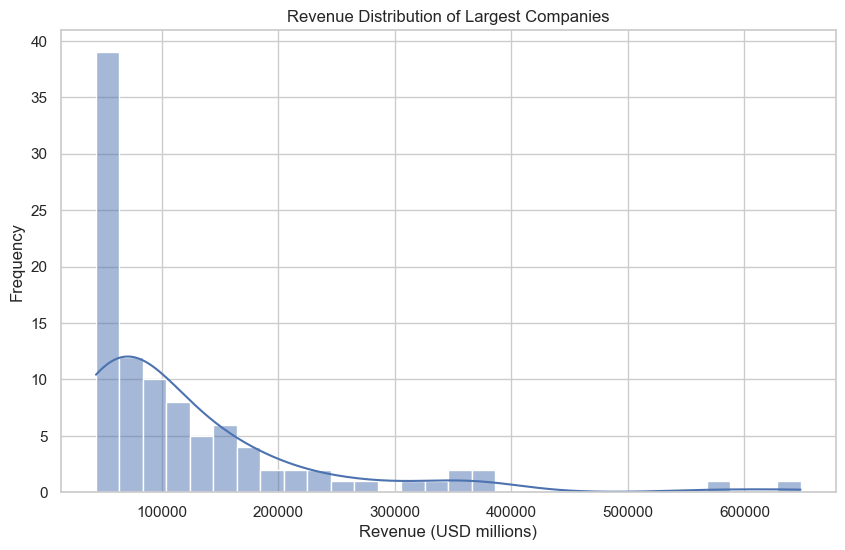

In [15]:
# Revenue Distribution

# Set style for seaborn
sns.set(style='whitegrid')

# Plot revenue distribution
plt.figure(figsize=(10,6))
sns.histplot(data['Revenue (USD millions)'], bins=30, kde=True)
plt.title('Revenue Distribution of Largest Companies')
plt.xlabel('Revenue (USD millions)')
plt.ylabel('Frequency')
plt.show()


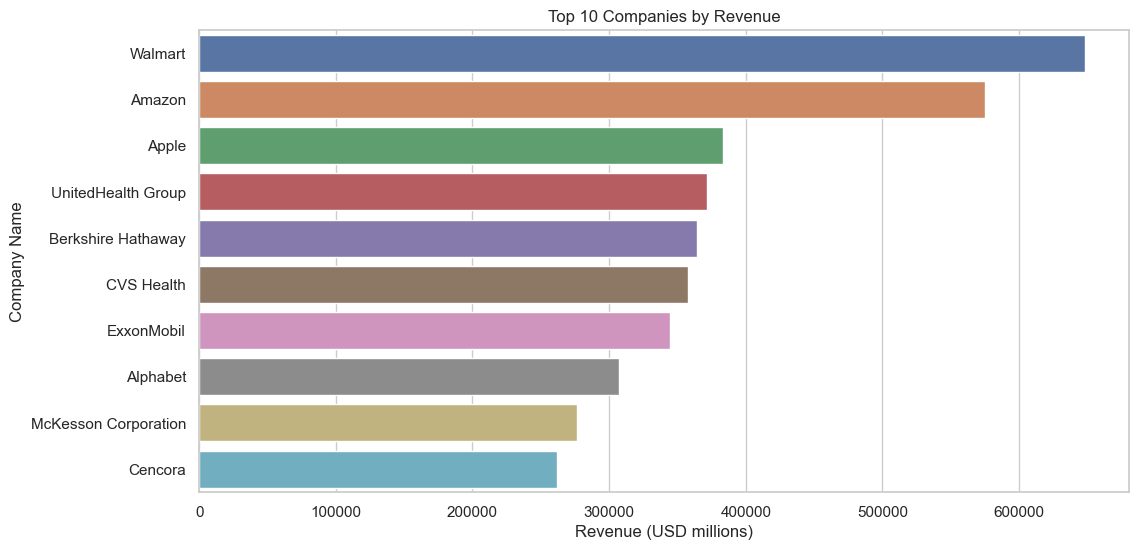

In [16]:
# Top 10 Companies by Revenue
top_companies = data.nlargest(10, 'Revenue (USD millions)')

plt.figure(figsize=(12,6))
sns.barplot(x='Revenue (USD millions)', y='Name', data=top_companies)
plt.title('Top 10 Companies by Revenue')
plt.xlabel('Revenue (USD millions)')
plt.ylabel('Company Name')
plt.show()


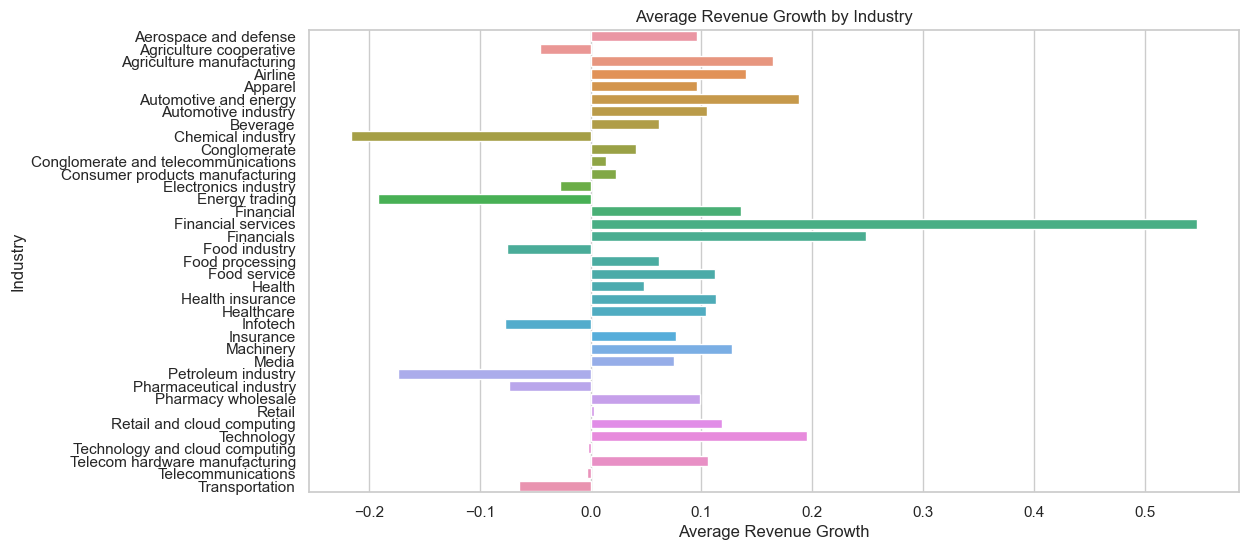

In [17]:
# Revenue Growth by Industry
industry_growth = data.groupby('Industry')['Revenue growth'].mean().reset_index()

plt.figure(figsize=(12,6))
sns.barplot(x='Revenue growth', y='Industry', data=industry_growth)
plt.title('Average Revenue Growth by Industry')
plt.xlabel('Average Revenue Growth')
plt.ylabel('Industry')
plt.show()

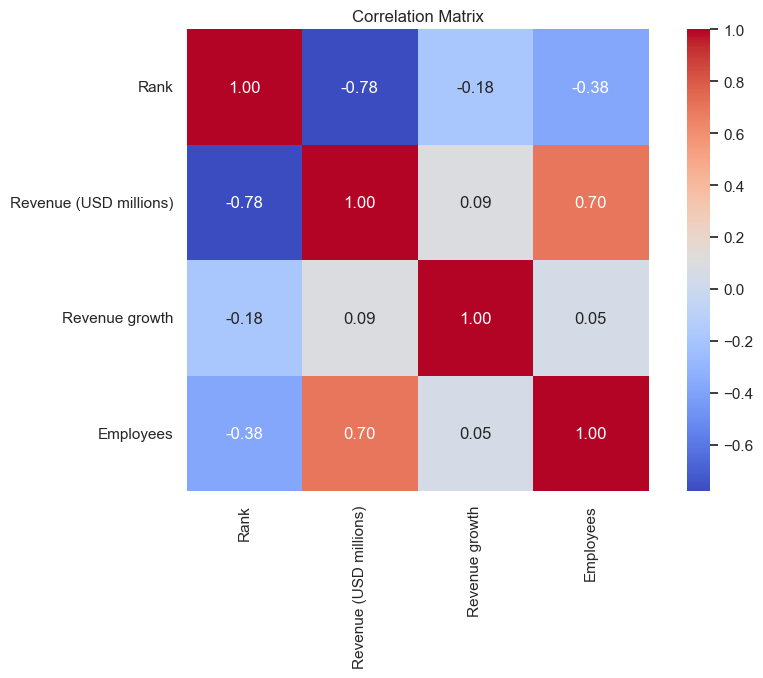

In [18]:
numeric_data = data.select_dtypes(include=[np.number])

# Coorelation Matrix
correlation = numeric_data.corr()

plt.figure(figsize=(10,6))
sns.heatmap(correlation, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Correlation Matrix')
plt.show()


##### 8.Revenue Analysis 

We assess the skewness and kurtosis of the revenue data and examine potential outliers.

Skewness of Revenue:  2.573237209153741
Kurtosis of Revenue:  7.961053314261534


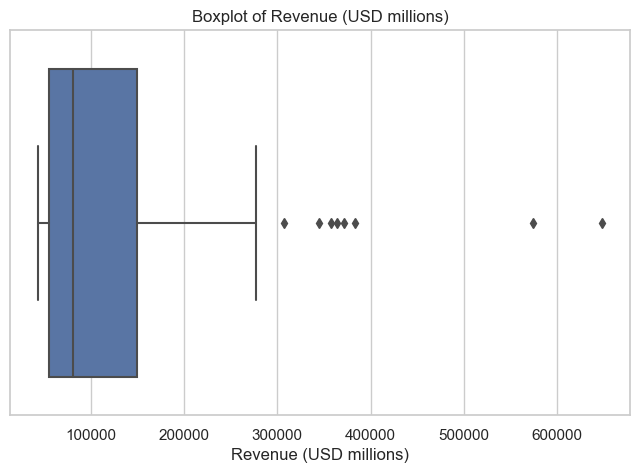

In [19]:
# Check skewness and kurtosis
print("Skewness of Revenue: ", data['Revenue (USD millions)'].skew())
print("Kurtosis of Revenue: ", data['Revenue (USD millions)'].kurtosis())

# Boxplot for outliers
plt.figure(figsize=(8,5))
sns.boxplot(x=data['Revenue (USD millions)'])
plt.title('Boxplot of Revenue (USD millions)')
plt.show()


##### 9.Growth Analysis

We explore the distribution of revenue growth among the companies.

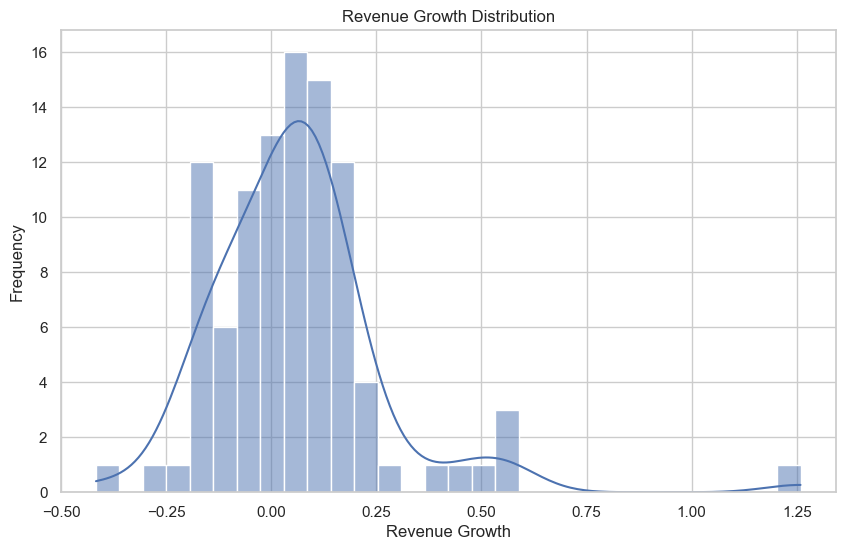

In [20]:
# Distribution of revenue growth
plt.figure(figsize=(10,6))
sns.histplot(data['Revenue growth'], bins=30, kde=True)
plt.title('Revenue Growth Distribution')
plt.xlabel('Revenue Growth')
plt.ylabel('Frequency')
plt.show()


##### 10.Employee Analysis

We analyze the distribution of employees and their relationship with revenue.

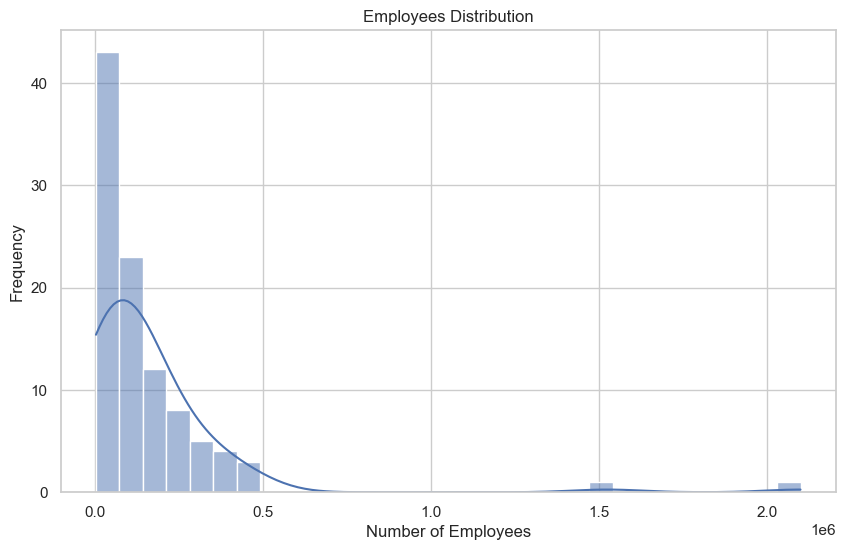

In [21]:
# Employees distribution
plt.figure(figsize=(10,6))
sns.histplot(data['Employees'], bins=30, kde=True)
plt.title('Employees Distribution')
plt.xlabel('Number of Employees')
plt.ylabel('Frequency')
plt.show()


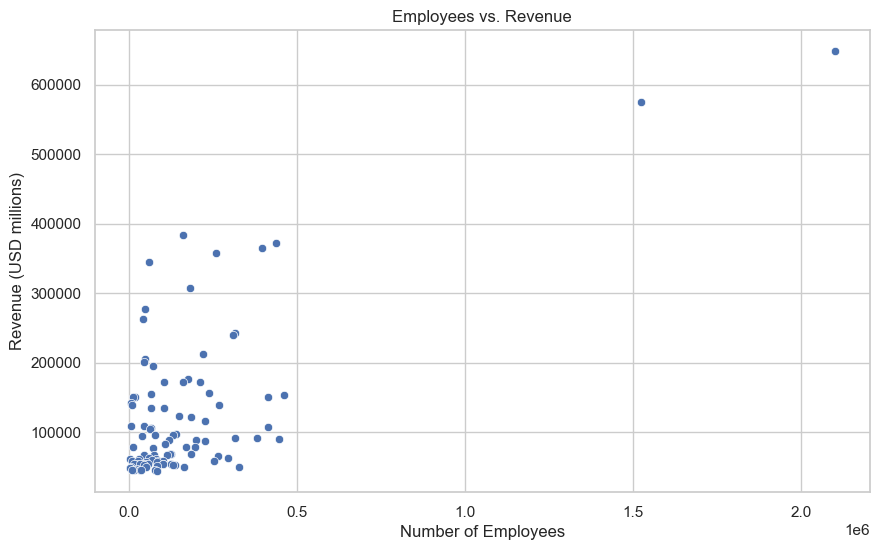

In [22]:
# Employee vs. Revenue scatter plot

plt.figure(figsize=(10,6))
sns.scatterplot(x='Employees', y='Revenue (USD millions)', data=data)
plt.title('Employees vs. Revenue')
plt.xlabel('Number of Employees')
plt.ylabel('Revenue (USD millions)')
plt.show()


##### 11.Industry Insights

We summarize average revenue and growth by industry.

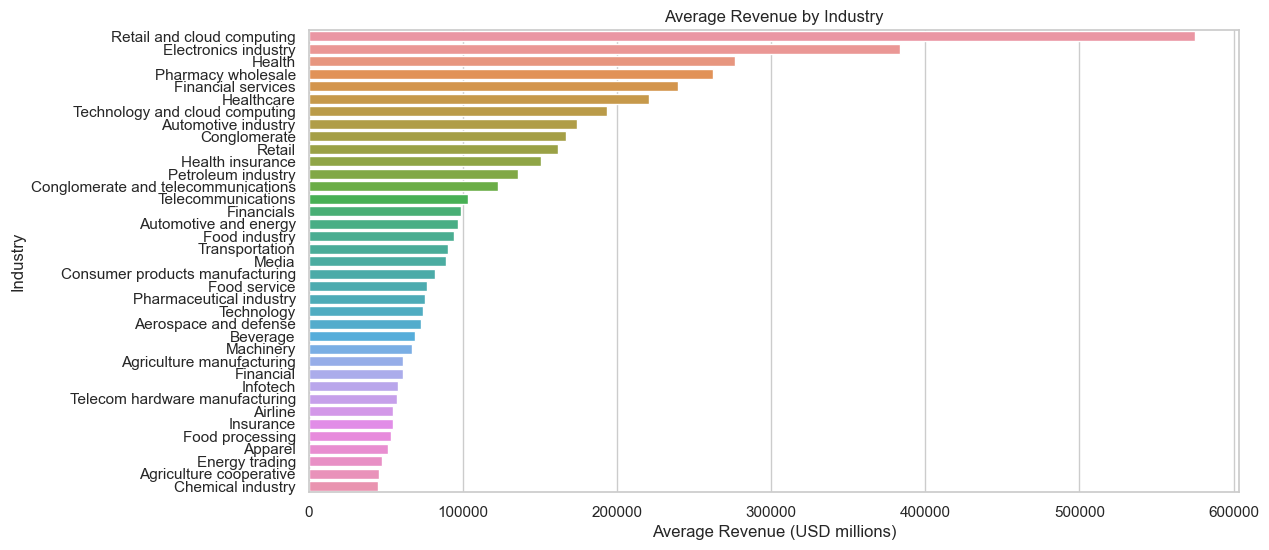

In [23]:
# Average revenue and growth by industry
industry_summary = data.groupby('Industry').agg(
    Average_Revenue=('Revenue (USD millions)', 'mean'),
    Average_Growth=('Revenue growth', 'mean'),
    Count=('Name', 'count')
).reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(x='Average_Revenue', y='Industry', data=industry_summary.sort_values('Average_Revenue', ascending=False))
plt.title('Average Revenue by Industry')
plt.xlabel('Average Revenue (USD millions)')
plt.ylabel('Industry')
plt.show()


##### 12.Company Performance Metrics

We identify the top and bottom companies by revenue growth.

In [24]:
# Top 5 and Bottom 5 companies by revenue growth
top_growth = data.nlargest(5, 'Revenue growth')
bottom_growth = data.nsmallest(5, 'Revenue growth')

print(" Top 5 Companies by Revenue Growth:\n", top_growth[['Name', 'Revenue growth']])
print("Bottom 5 Companies by Revenue Growth:\n", bottom_growth[['Name', 'Revenue growth']])


 Top 5 Companies by Revenue Growth:
                Name  Revenue growth
64           Nvidia           1.259
34    Goldman Sachs           0.578
20        Citigroup           0.551
11   JPMorgan Chase           0.547
17  Bank of America           0.494
Bottom 5 Companies by Revenue Growth:
                         Name  Revenue growth
68                    Pfizer          -0.417
67            ConocoPhillips          -0.287
98      Dow Chemical Company          -0.216
92  World Kinect Corporation          -0.192
28             Valero Energy          -0.188


##### 13.Visualization of Relationships

A pairplot is useful to visualize relationships between revenue, growth, and number of employees.

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


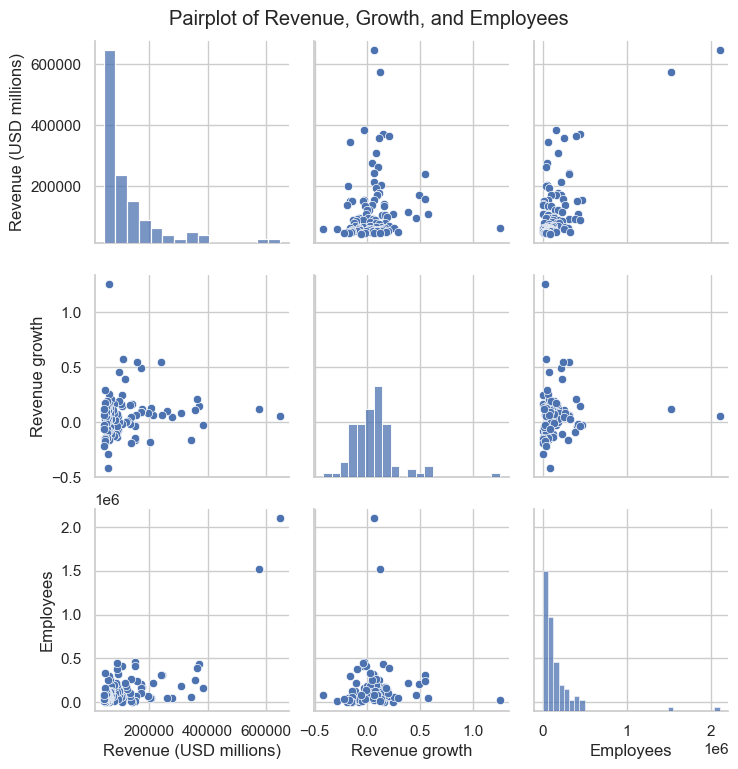

In [25]:
# Pairplot
sns.pairplot(data[['Revenue (USD millions)', 'Revenue growth', 'Employees']])
plt.suptitle('Pairplot of Revenue, Growth, and Employees', y=1.02)
plt.show()


##### 14.T-Tests

We perform a T-test to compare revenue growth between two industries.

In [26]:
from scipy import stats

# Separate data by industry
tech_growth = data[data['Industry'] == 'Technology']['Revenue growth']
health_growth = data[data['Industry'] == 'Healthcare']['Revenue growth']

# Perform T-test
t_stat, p_value = stats.ttest_ind(tech_growth, health_growth, equal_var=False)

print(f"T-statistic: {t_stat}, P-value: {p_value}")

# Interpret the p-value
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference in revenue growth.")
else:
    print("Fail to reject the null hypothesis: No significant difference in revenue growth.")
    
    

T-statistic: 0.4125194243016107, P-value: 0.6969460868722389
Fail to reject the null hypothesis: No significant difference in revenue growth.


##### 15.ANOVA(Analysis of Variance)

We conduct ANOVA to determine if there are significant differences in revenue growth among different industries.

In [27]:
# Prepare data for ANOVA
groups = []
for industry in ['Technology', 'Healthcare', 'Finance']:
    groups.append(data[data['Industry'] == industry]['Revenue growth'].dropna())

# Perform ANOVA
f_stat, p_value_anova = stats.f_oneway(*groups)

print(f"F-statistic: {f_stat}, P-value: {p_value_anova}")

# Interpret the p-value
if p_value_anova < alpha:
    print("Reject the null hypothesis: At least one industry has a significantly different revenue growth.")
else:
    print("Fail to reject the null hypothesis: No significant difference in revenue growth among industries.")



F-statistic: nan, P-value: nan
Fail to reject the null hypothesis: No significant difference in revenue growth among industries.


C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_stats_py.py:4133: DegenerateDataWarning: at least one input has length 0
  warnings.warn(stats.DegenerateDataWarning('at least one input '


In [28]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Prepare data for Tukey's HSD
data_tukey = data[['Revenue growth', 'Industry']].dropna()
tukey_results = pairwise_tukeyhsd(data_tukey['Revenue growth'], data_tukey['Industry'], alpha=0.05)
print(tukey_results)


                             Multiple Comparison of Means - Tukey HSD, FWER=0.05                              
               group1                              group2               meandiff p-adj   lower   upper  reject
--------------------------------------------------------------------------------------------------------------
              Aerospace and defense             Agriculture cooperative   -0.142    1.0 -1.1438  0.8598  False
              Aerospace and defense           Agriculture manufacturing    0.069    1.0 -0.9328  1.0708  False
              Aerospace and defense                             Airline   0.0443    1.0 -0.7024  0.7911  False
              Aerospace and defense                             Apparel      0.0    1.0 -1.0018  1.0018  False
              Aerospace and defense               Automotive and energy    0.092    1.0 -0.9098  1.0938  False
              Aerospace and defense                 Automotive industry   0.0095    1.0 -0.8085  0.8275  False
 

##### 16.Revenue per Employee

In [29]:
data['Revenue per Employee'] = data['Revenue (USD millions)'] / data['Employees']

print(data[['Revenue (USD millions)', 'Employees', 'Revenue per Employee']])

    Revenue (USD millions)  Employees  Revenue per Employee
0                 648125.0  2100000.0              0.308631
1                 574785.0  1525000.0              0.376908
2                 383482.0   161000.0              2.381876
3                 371622.0   440000.0              0.844595
4                 364482.0   396500.0              0.919248
..                     ...        ...                   ...
95                 45735.0    16023.0              2.854334
96                 45590.0    10609.0              4.297295
97                 45006.0    34100.0              1.319824
98                 44622.0    35900.0              1.242953
99                 43452.0    85000.0              0.511200

[100 rows x 3 columns]


##### 17.Growth Rate Categories

In [30]:
# Define growth rate categories
def categorize_growth(rate):
    if rate > 10:
        return 'High Growth'
    elif 0 < rate <= 10:
        return 'Stable'
    else:
        return 'Declining'
    
# Create a new column for growth rate categories
data['Growth Rate Category'] = data['Revenue growth'].apply(categorize_growth)

print(data[['Industry', 'Revenue growth', 'Growth Rate Category']])

                      Industry  Revenue growth Growth Rate Category
0                       Retail           0.060               Stable
1   Retail and cloud computing           0.119               Stable
2         Electronics industry          -0.028            Declining
3                   Healthcare           0.146               Stable
4                 Conglomerate           0.207               Stable
..                         ...             ...                  ...
95                  Financials           0.118               Stable
96     Agriculture cooperative          -0.046            Declining
97     Pharmaceutical industry          -0.025            Declining
98           Chemical industry          -0.216            Declining
99                      Retail          -0.061            Declining

[100 rows x 3 columns]


##### 18.Revenue Share by Industry

In [31]:
# Calculate total revenue
total_revenue = data['Revenue (USD millions)'].sum()

# Calculate revenue share by industry
data['Revenue Share by Industry'] = data['Revenue (USD millions)']/ total_revenue * 100


print(data[['Industry', 'Revenue (USD millions)', 'Revenue Share by Industry']])

                      Industry  Revenue (USD millions)  \
0                       Retail                648125.0   
1   Retail and cloud computing                574785.0   
2         Electronics industry                383482.0   
3                   Healthcare                371622.0   
4                 Conglomerate                364482.0   
..                         ...                     ...   
95                  Financials                 45735.0   
96     Agriculture cooperative                 45590.0   
97     Pharmaceutical industry                 45006.0   
98           Chemical industry                 44622.0   
99                      Retail                 43452.0   

    Revenue Share by Industry  
0                    5.297472  
1                    4.698025  
2                    3.134403  
3                    3.037465  
4                    2.979106  
..                        ...  
95                   0.373817  
96                   0.372631  
97             

##### 19.Saving the Cleaned Dataset

In [32]:
data.to_csv('cleaned_data_after_eda.csv', index=False)

##### 20.Visualizing the EDA Results

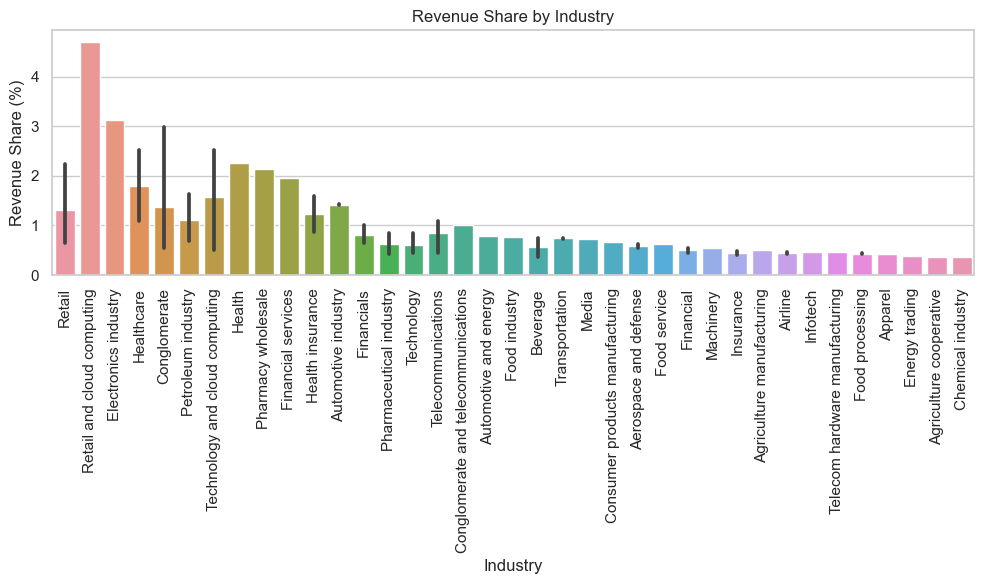

In [33]:
# Example: Revenue Share by Industry (Bar Plot)
plt.figure(figsize=(10, 6))
sns.barplot(data=data, x='Industry', y='Revenue Share by Industry')
plt.xticks(rotation=90)
plt.title('Revenue Share by Industry')
plt.xlabel('Industry')
plt.ylabel('Revenue Share (%)')
plt.tight_layout()
plt.savefig('revenue_share_by_industry.png')  # Save the plot
plt.show()

##### 21.Saving the EDA Summary as a Report

In [34]:
# Descriptive statistics summary
summary = data.describe()
summary.to_csv('eda_summary_report.csv')

#### Insights on the Top 100 U.S. Companies by Revenue
- Dataset Overview
- Analyzed a dataset containing the top 100 U.S. companies by revenue, including fields such as:

**Rank
Name
Industry
Revenue
Revenue Growth
Number of Employees
Headquarters**

##### Descriptive Statistics

- Average Revenue: Approximately **$122,346 billion**.

- Maximum Revenue: **$648,125 billion**.

- Minimum Revenue: **$43,452 billion**.

- Average Revenue Growth: **0.06%**.

- Standard Deviation of Revenue Growth: Indicates significant variability in performance among companies.

###### Industry Performance

- Retail and Cloud Computing: Highest average revenue of **$574,785 billion**.

- Electronics Industry: Average revenue of **$383,482 billion**, showcasing its importance in the economy.

- Health Sector: Follows closely with an average revenue of **$276,711 billion**, reflecting its substantial impact.

- Pharmacy Wholesale: Average revenue of **$262,173 billion**, vital for pharmaceutical distribution.

- Financial Services: Average revenue of **$239,425 billion**, underscoring its significance in economic stability.
 
###### Revenue Growth Distribution

- Positive Revenue Growth: **64%** of companies.
- Negative Revenue Growth: **36%** of companies, indicating competitive dynamics and economic challenges.

###### Data Visualization

- Created visualizations to:

- Represent the distribution of revenue growth across companies.
- Illustrate the relationship between industries and their average revenues, enhancing data interpretability.

##### Conclusion
The analysis provides critical insights into the performance of major U.S. companies and identifies key sectors contributing to economic growth. The substantial proportion of companies with positive revenue growth suggests opportunities for investment and expansion. These insights can inform strategic decisions for businesses and investors alike.